# FFT

Media de periodicidades: 161.15 minutos
Mediana de periodicidades: 76.63 minutos
Modas de periodicidades: 41.94, 42.70, 78.28, 79.30, 81.04, 81.71, 82.35 minutos
Desviación estándar: 705.00 minutos
Periodicidad mínima: 2.24 minutos
Periodicidad máxima: 11668.28 minutos
Intervalo de confianza de la media: (100.3551076912104, 221.94582449021212)
Intervalo de confianza de la mediana: [46.51249985 78.41041641]


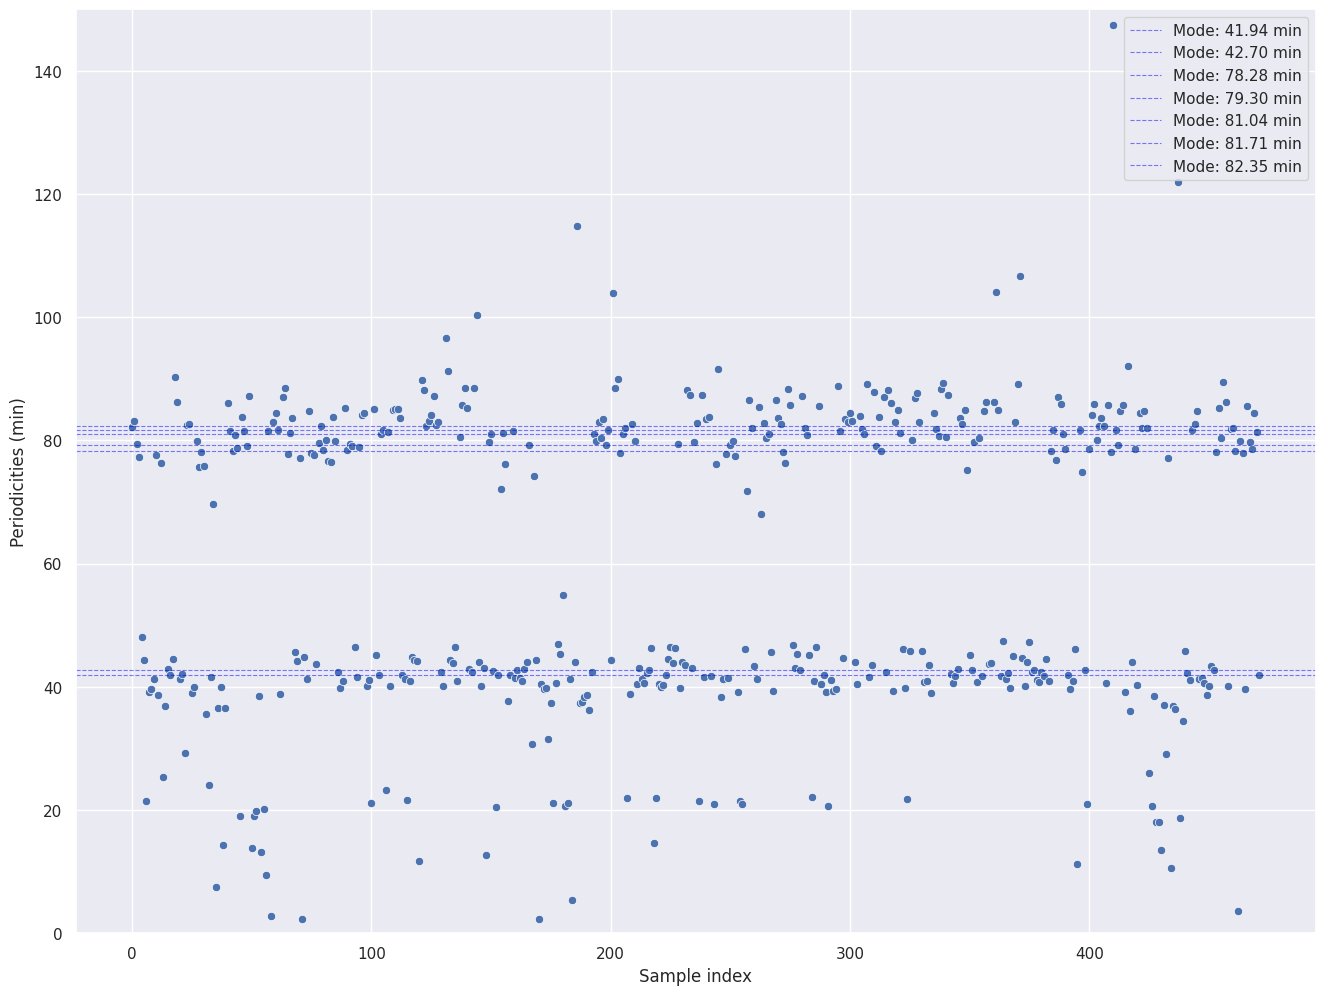

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Configuración de Seaborn
sns.set(style='darkgrid')

# Paso 1: Leer los datos del archivo periodicidades.txt
file_path = 'periodicidades.txt'  # Cambia esto por la ruta correcta de tu archivo
periods_days = pd.read_csv(file_path, header=None, names=['period_days'])

# Paso 2: Convertir las periodicidades de días a minutos
periods_minutes = periods_days['period_days'] * 24 * 60  # 1 día = 1440 minutos
periods_minutes = periods_minutes.dropna()  # Filtrar valores NaN
periods_days['period_minutes'] = periods_minutes

# Paso 3: Cálculo de estadísticas básicas
mean_minutes = periods_minutes.mean()
median_minutes = periods_minutes.median()
moda_minutes = periods_minutes.mode()
std_minutes = periods_minutes.std()
min_minutes = periods_minutes.min()
max_minutes = periods_minutes.max()

# Intervalo de confianza de la media usando la t-distribución (95%)
conf_interval_mean = stats.t.interval(0.95, df=len(periods_minutes)-1, loc=mean_minutes, scale=std_minutes / np.sqrt(len(periods_minutes)))

# Intervalo de confianza de la mediana usando bootstrap
n_bootstraps = 10000
bootstrapped_medians = []

# Bootstrap sample generation and calculation of medians
for _ in range(n_bootstraps):
    sample = np.random.choice(periods_minutes, size=len(periods_minutes), replace=True)
    bootstrapped_medians.append(np.median(sample))

# Convert list to numpy array for easier manipulation
bootstrapped_medians = np.array(bootstrapped_medians)

# Calculate the confidence intervals for the medians
conf_interval_median = np.percentile(bootstrapped_medians, [2.5, 97.5])

# Imprimir los resultados
print(f"Media de periodicidades: {mean_minutes:.2f} minutos")
print(f"Mediana de periodicidades: {median_minutes:.2f} minutos")
modas_formateadas = ', '.join([f"{moda:.2f}" for moda in moda_minutes])
print(f"Modas de periodicidades: {modas_formateadas} minutos")
print(f"Desviación estándar: {std_minutes:.2f} minutos")
print(f"Periodicidad mínima: {min_minutes:.2f} minutos")
print(f"Periodicidad máxima: {max_minutes:.2f} minutos")
print(f"Intervalo de confianza de la media: {conf_interval_mean}")
print(f"Intervalo de confianza de la mediana: {conf_interval_median}")

# Paso 4: Generación de gráficos

# Crear una figura con varios subplots
plt.figure(figsize=(16, 12))

# # Gráfico 1: Histograma
# plt.subplot(2, 2, 1)
# sns.histplot(periods_minutes, bins='auto', kde=True, color='blue')
# plt.axvline(mean_minutes, color='red', linestyle='--', label=f'Media: {mean_minutes:.2f} min')
# plt.axvline(median_minutes, color='orange', linestyle='--', label=f'Mediana: {median_minutes:.2f} min')
# plt.fill_betweenx([0, plt.ylim()[1]], conf_interval_mean[0], conf_interval_mean[1], color='red', alpha=0.2, label='IC de la media (95%)')
# plt.fill_betweenx([0, plt.ylim()[1]], conf_interval_median[0], conf_interval_median[1], color='orange', alpha=0.2, label='IC de la mediana (95%)')
# plt.xlim(0, 300)  # Limitar el eje y a 200 minutos
# plt.title('Histograma de Periodicidades (en minutos)')
# plt.xlabel('Periodicidad (minutos)')
# plt.ylabel('Frecuencia')
# plt.legend()
# 
# # Gráfico 2: KDE (Kernel Density Estimate)
# plt.subplot(2, 2, 2)
# sns.kdeplot(periods_minutes, fill=True, color='green')
# plt.axvline(mean_minutes, color='red', linestyle='--', label=f'Media: {mean_minutes:.2f} min')
# plt.axvline(median_minutes, color='orange', linestyle='--', label=f'Mediana: {median_minutes:.2f} min')
# plt.fill_betweenx([0, plt.ylim()[1]], conf_interval_mean[0], conf_interval_mean[1], color='red', alpha=0.2, label='IC de la media (95%)')
# plt.fill_betweenx([0, plt.ylim()[1]], conf_interval_median[0], conf_interval_median[1], color='orange', alpha=0.2, label='IC de la mediana (95%)')
# plt.xlim(-700, 1200)  # Limitar el eje y a 200 minutos
# plt.title('Gráfico de Densidad KDE de Periodicidades (en minutos)')
# plt.xlabel('Periodicidad (minutos)')
# plt.ylabel('Densidad')
# plt.legend()
# 
# # Gráfico 3: Boxplot
# plt.subplot(2, 2, 3)
# sns.boxplot(x=periods_minutes, color='orange')
# plt.axvline(mean_minutes, color='red', linestyle='--', label=f'Media: {mean_minutes:.2f} min')
# plt.axvline(median_minutes, color='orange', linestyle='--', label=f'Mediana: {median_minutes:.2f} min')
# plt.xlim(0, 200)  # Limitar el eje y a 200 minutos
# plt.title('Boxplot de Periodicidades (en minutos)')
# plt.xlabel('Periodicidad (minutos)')
# plt.legend()

# Gráfico 4: Gráfico de dispersión (scatter plot) con tendencia
# Calcular los cuartiles
Q1 = periods_minutes.quantile(0.25)
Q3 = periods_minutes.quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los outliers
periods_minutes_sin_outliers = periods_minutes[(periods_minutes >= limite_inferior) & (periods_minutes <= limite_superior)]

# Graficar la tendencia sin outliers
#plt.subplot(2, 2, 4)
# sns.regplot(x=np.arange(len(periods_minutes_sin_outliers)), y=periods_minutes_sin_outliers, scatter=True, line_kws={"color": "red"})
sns.scatterplot(x=np.arange(len(periods_minutes_sin_outliers)), y=periods_minutes_sin_outliers) #, scatter=True) #, line_kws={"color": "red"})
# plt.title('Tendencia de las Periodicidades (en minutos)')
# plt.title('Moda de las Periodicidades (en minutos)')
plt.xlabel('Sample index')
plt.ylabel('Periodicities (min)')
plt.ylim(0, 150)  # Limitar el eje y a 200 minutos
#plt.legend()

# Agregar líneas horizontales para cada moda
for moda in moda_minutes:
    # plt.axhline(y=moda, color='blue', linestyle='--', label=f'Moda: {moda:.2f} min')
    plt.axhline(y=moda, color='blue', linestyle='--', linewidth=0.8, alpha=0.5, label=f'Mode: {moda:.2f} min')


# Evitar etiquetas duplicadas en la leyenda
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())


# Ajustar los gráficos
# plt.tight_layout()
# plt.savefig("fft_sample_1.png", format='png', dpi=300)
plt.show()
